Enter number of edges:  25


Enter each edge (example: A B):


 A B
 A C
 A D
 B E
 B F
 C G
 C H
 D I
 D J
 E G
 E H
 F I
 F J
 G I
 G J
 H I
 H J
 I J
 B G
 C E
 D F
 A E
 C F
 B H
 D G
Enter the starting node for BFS:  A



Input Graph:


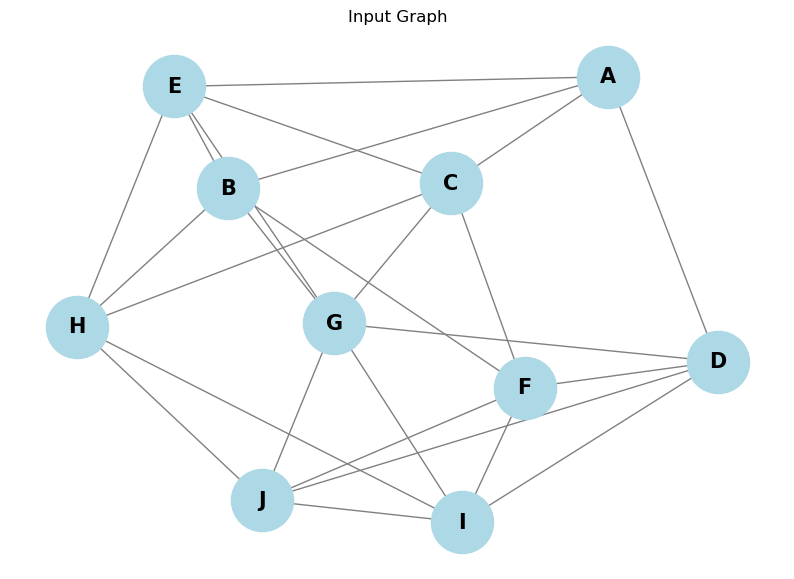


BFS Traversal Sequence: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

BFS Tree (Traversal Tree):


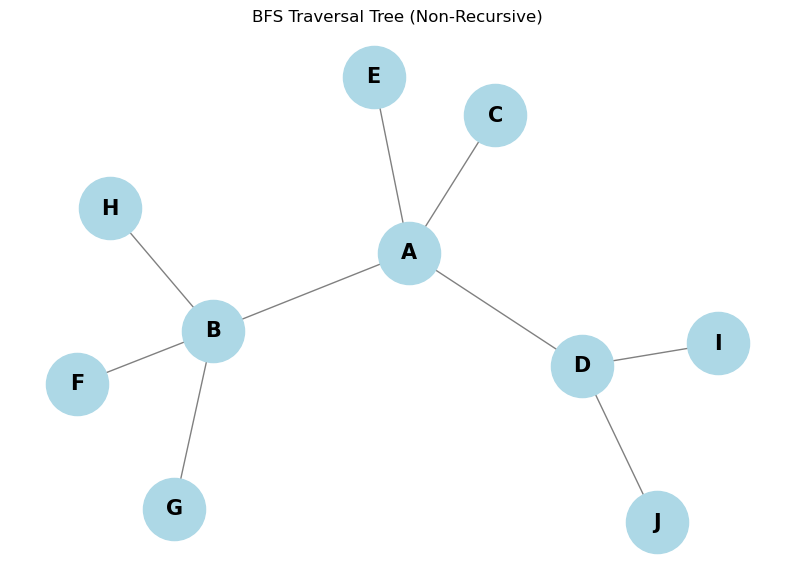

In [1]:
# BFS Algorithm - Read undirected unweighted graph from USER input
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def read_graph_from_user():
    graph = {}
    n = int(input("Enter number of edges: "))
    print("Enter each edge (example: A B):")
    
    for _ in range(n):
        u, v = input().split()
        
        if u not in graph:
            graph[u] = []
        if v not in graph:
            graph[v] = []
            
        graph[u].append(v)
        graph[v].append(u)  # undirected graph
        
    return graph

def bfs_non_recursive(graph, start_node):
    visited = set()
    output_graph = {}
    traversal_sequence = []
    
    if start_node not in graph:
        print(f"Start node {start_node} not found in the graph.")
        return output_graph, traversal_sequence
    
    queue = deque([start_node])
    visited.add(start_node)
    
    while queue:
        node = queue.popleft()
        traversal_sequence.append(node)
        
        if node not in output_graph:
            output_graph[node] = []
        
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                
                if neighbor not in output_graph:
                    output_graph[neighbor] = []
                output_graph[node].append(neighbor)
                output_graph[neighbor].append(node)
    
    return output_graph, traversal_sequence

def visualize_graph(graph, title):
    G = nx.Graph()
    
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 7))
    plt.title(title)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray',
            node_size=2000, font_size=15, font_weight='bold')
    plt.show()

# -------- Main Program --------

graph = read_graph_from_user()
start_node = input("Enter the starting node for BFS: ")

print("\nInput Graph:")
visualize_graph(graph, "Input Graph")

output_graph_iterative, traversal_sequence_iterative = bfs_non_recursive(graph, start_node)

print("\nBFS Traversal Sequence:", traversal_sequence_iterative)

print("\nBFS Tree (Traversal Tree):")
visualize_graph(output_graph_iterative, "BFS Traversal Tree (Non-Recursive)")


In [ ]:
def bfs_non_recursive(graph, start_node):
    visited = set()  # Tracks visited nodes
    output_graph = {}  # Stores the BFS traversal tree
    traversal_sequence = []  # Records the BFS order
    
    # Check if start_node exists in the graph
    if start_node not in graph:
        print(f"Start node {start_node} not found in the graph.")
        return output_graph, traversal_sequence
    
    # Initialize queue with start_node
    queue = deque([start_node])
    visited.add(start_node)
    
    # Process nodes in BFS order
    while queue:
        node = queue.popleft()  # Get the next node (FIFO)
        traversal_sequence.append(node)  # Record traversal order
        
        # Initialize node in output_graph if not present
        if node not in output_graph:
            output_graph[node] = []
        
        # Explore neighbors
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                
                # Update BFS tree (bidirectional for undirected graph)
                if neighbor not in output_graph:
                    output_graph[neighbor] = []
                output_graph[node].append(neighbor)
                output_graph[neighbor].append(node)
    
    return output_graph, traversal_sequence

In [ ]:
def visualize_graph(graph, title):
    G = nx.Graph()  # Create empty graph
    
    # Add edges from adjacency list
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    
    # Draw the graph
    pos = nx.spring_layout(G)  # Node positioning
    plt.figure(figsize=(10, 7))
    plt.title(title)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray',
            node_size=2000, font_size=15, font_weight='bold')
    plt.show()

    